In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
audio, sr = librosa.load('sample1.sph', sr=16000)

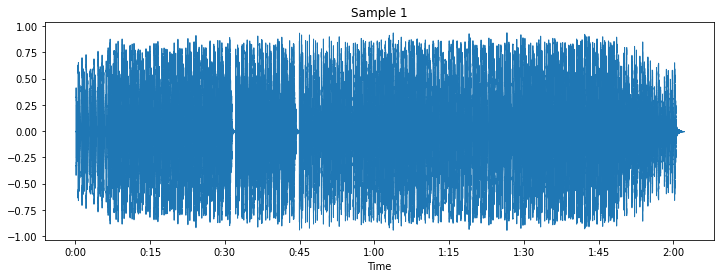

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr, ax=ax)
ax.set(title='Sample 1')
plt.show()

In [4]:
librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

array([[-4.35413177e+02, -1.64063019e+02, -9.21746979e+01, ...,
        -5.25545715e+02, -5.26005371e+02, -5.27448181e+02],
       [ 6.09894409e+01,  1.02941544e+02,  1.03080704e+02, ...,
         2.88524127e+00,  2.23865080e+00,  2.11444110e-01],
       [-5.67564392e+00, -3.99072342e+01, -3.86710548e+01, ...,
         2.83243704e+00,  2.19612455e+00,  2.08391041e-01],
       ...,
       [-5.46538019e+00, -1.52648487e+01, -1.31801567e+01, ...,
         1.32585633e+00,  9.86955881e-01,  1.18660554e-01],
       [ 9.04716969e-01, -4.67857552e+00, -2.44677782e+00, ...,
         1.04081035e+00,  7.59271801e-01,  1.01003848e-01],
       [ 1.20667524e+01, -5.29598904e+00, -7.33856583e+00, ...,
         7.45650113e-01,  5.23968279e-01,  8.24358761e-02]], dtype=float32)

In [5]:
librosa.feature.melspectrogram(y=audio, sr=sr)

array([[2.8465496e-05, 7.1441219e-04, 9.1371275e-03, ..., 2.0398770e-06,
        2.2592028e-06, 2.9989628e-06],
       [1.5179688e-04, 2.0897384e-03, 1.0563705e-02, ..., 3.8418796e-07,
        2.2156345e-07, 2.6904246e-07],
       [2.1958433e-04, 4.8070706e-02, 1.5038311e-01, ..., 1.1512882e-05,
        2.6172033e-06, 4.9615386e-07],
       ...,
       [1.3060571e-07, 1.3063161e-04, 7.1629405e-04, ..., 2.2859761e-09,
        2.1839810e-09, 1.4544279e-09],
       [1.2967686e-07, 5.2852422e-05, 2.0205979e-04, ..., 7.5335294e-10,
        5.4390709e-10, 4.6419033e-10],
       [6.5384009e-09, 1.2348688e-06, 3.5489743e-06, ..., 5.0992273e-11,
        5.2604501e-11, 4.4805548e-11]], dtype=float32)

In [4]:
audio_file = 'sample1.sph'
from librosa import feature
import numpy as np

fn_list_i = [
  feature.chroma_stft,
  feature.spectral_centroid,
  feature.spectral_bandwidth,
  feature.spectral_rolloff,
  feature.mfcc,
  feature.melspectrogram,
]

fn_list_ii = [
  feature.zero_crossing_rate,
]

def get_feature_vector(y, sr):
  feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
  feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii]
  
  feature_vector =   feat_vect_i + feat_vect_ii  
  return feature_vector

audios_feat = []

y, sr = librosa.load(audio_file, sr=None)
feature_vector = get_feature_vector(y, sr)
audios_feat.append(feature_vector)

print(audios_feat)

import csv
norm_output = 'features_sample1.csv'
header = [
  'chroma_stft',
  'spectral_centroid',
  'spectral_bandwidth',
  'spectral_rolloff',
  'mfcc',
  'melspectrogram',
  'zero_crossing_rate',
]
with open(norm_output, '+w') as csvfile:
  writer = csv.writer(csvfile, delimiter=',')
  writer.writerow(header)
  writer.writerows(audios_feat)

C:\Users\jayak\AppData\Local\Temp\ipykernel_22496\772390426.py:19: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 1.5258789e-05
 1.5258789e-05], sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]


[[0.38440812, 1913.3172395578756, 2438.1933080627623, 3941.5239685331303, 1.0976492, 8.132589, 0.03933725394227113]]
